In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion = keras.datasets.fashion_mnist

In [3]:
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4431872/4422102 [==============================] - 2s 1us/step


Image Label : 5


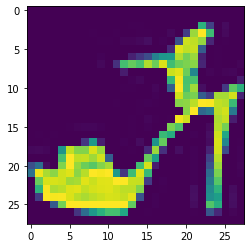

In [6]:
# let’s have a quick look at one of the samples of the images from the dataset

imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [7]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
# Building a Neural Network Architecture

classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
classifier.add(tf.keras.layers.Dense(300, activation="relu"))
classifier.add(tf.keras.layers.Dense(100, activation="relu"))
classifier.add(tf.keras.layers.Dense(10, activation="softmax"))

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Let's split the training data into training and validation sets

xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [12]:
# Training a Classification Model with Neural Networks

classifier.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = classifier.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7050 - accuracy: 0.7703 - val_loss: 0.4957 - val_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4825 - accuracy: 0.8325 - val_loss: 0.4811 - val_accuracy: 0.8356
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4393 - accuracy: 0.8466 - val_loss: 0.4267 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4117 - accuracy: 0.8561 - val_loss: 0.3994 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3928 - accuracy: 0.8620 - val_loss: 0.3740 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8667 - val_loss: 0.3783 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3643 - accuracy: 0.8710 - val_loss: 0.3627 - val_accuracy:

In [14]:
# let’s have a look at the predictions

new = xtest[:5]
predictions = classifier.predict(new)
print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [15]:
# let's look at the predicted classes

classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]


In [16]:
ytest[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

Image Label : 2


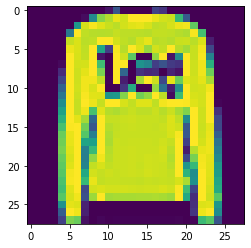

In [18]:
imgIndex = 1
image = xtest[imgIndex]
print("Image Label :",ytest[imgIndex])
plt.imshow(image)